# Introduction to Deep Learning with PyTorch

[PyTorch](http://pytorch.org/), a framework for building and training neural networks. 

## Neural Networks

Deep Learning is based on artificial neural networks which have been around in some form since the late 1950s. 

The networks are built from individual parts approximating neurons, typically called units or simply "neurons." 

Each unit has some number of weighted inputs. 

These weighted inputs are summed together (a linear combination) then passed through an activation function to get the unit's output.

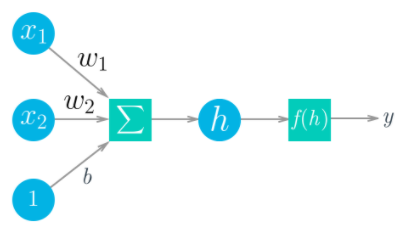

Mathematically this looks like: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

## Tensors

PyTorch in a lot of ways behaves like the arrays you love from Numpy. These Numpy arrays, after all, are just tensors. 

PyTorch takes these tensors and makes it simple to move them to __GPUs for the faster processing needed when training neural networks.__

PyTorch tensors can be added, multiplied, subtracted, etc, just like Numpy arrays. 

In general, you'll use PyTorch tensors pretty much the same way you'd use Numpy arrays. 

It also provides a module that automatically calculates gradients (for backpropagation!) and another module specifically for building neural networks.

All together, PyTorch ends up being more coherent with Python and the Numpy/Scipy stack compared to TensorFlow and other frameworks.

It turns out neural network computations are just a bunch of linear algebra operations on *tensors*, a generalization of matrices. 

A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). 

The fundamental data structure for neural networks are tensors and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.

<img src="assets/tensor_examples.svg" width=600px>


##  Calculate the output for a single neuron

In [1]:
# Import PyTorch
import torch

In [2]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [3]:
# Generate data (use a seed for predictability, data is used for calculating the output of the simple single layer network)
torch.manual_seed(7) 

# Create a tensor with shape (1, 5) - i.e. 1 row and 5 columns 
# Values are randomly distributed according to the normal distribution with a mean of 0 and standard deviation of 1. 
features = torch.randn((1, 5))

# Create another tensor with same shape as 'features'
# Values are randomly distributed according to the normal distribution
weights = torch.randn_like(features)

# A single value from a normal distribution
bias = torch.randn((1, 1))

In [4]:
# Calculate the output of the single layer network using sum() function

y = activation(torch.sum(features * weights) + bias)

y = activation((features * weights).sum() + bias)

print(y)

tensor([[0.1595]])


Other than using sum(), it is more efficient to use matrix multiplications.

Remember that for matrix multiplications, the number of columns in the first tensor must equal to the number of rows in the second tensor. To check the shape of a tensor called `tensor`, use `tensor.shape`. 

Both `features` and `weights` have the same shape, `(1, 5)`. This means we need to change the shape of `weights` to get the matrix multiplication to work. There are a few options here: [`weights.reshape()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape), 
[`weights.resize_()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.resize_), and 
[`weights.view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view).

For instance, for `.view()`, we can reshape `weights` to have five rows and one column with `weights.view(5, 1)`.

In [6]:
# Calculate the output of the single layer network using matrix multiplication
features.shape

torch.Size([1, 5])

In [7]:
weights.shape

torch.Size([1, 5])

In [8]:
bias.shape

torch.Size([1, 1])

In [10]:
y = activation(torch.mm(features, weights.view(5,1)) + bias)
print(y)

tensor([[0.1595]])


## Calculate the output for multi-layer network

Stack the individual neurons into stacks of layers. 

The output of one layer of neurons becomes the input for the next layer. 

With multiple input units and output units, we now need to express the weights as a matrix.

<img src='assets/multilayer_diagram_weights.png' width=450px>

The first layer shown on the bottom here are the inputs, understandably called the **input layer**. The middle layer is called the **hidden layer**, and the final layer (on the right) is the **output layer**. We can express this network mathematically with matrices again and use matrix multiplication to get linear combinations for each unit in one operation. For example, the hidden layer ($h_1$ and $h_2$ here) can be calculated 

$$
\vec{h} = [h_1 \, h_2] = 
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

The output for this small network is found by treating the hidden layer as inputs for the output unit. The network output is expressed simply

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$

In [11]:
# Generate data (use a seed for predictability, data is used for calculating the output of the simple single layer network)
torch.manual_seed(7) 

# Create a tensor with shape (1, 5) - i.e. 1 row and 3 columns 
# Values are randomly distributed according to the normal distribution with a mean of 0 and standard deviation of 1. 
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)

# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [12]:
# Calculate the output of the multi-layer network using matrix multiplication

h = activation(torch.mm(features, W1) + B1)

output = activation(torch.mm(h, W2) + B2)

print(output)

tensor([[0.3171]])


If you did this correctly, you should see the output `tensor([[ 0.3171]])`.

The number of hidden units a parameter of the network, often called a **hyperparameter** to differentiate it from the weights and biases parameters. The more hidden units a network has, and the more layers, the better able it is to learn from data and make accurate predictions.

## Numpy to Torch and back

Special bonus section! PyTorch has a great feature for converting between Numpy arrays and Torch tensors. To create a tensor from a Numpy array, use `torch.from_numpy()`. To convert a tensor to a Numpy array, use the `.numpy()` method.

In [13]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.28354485, 0.22064758, 0.90817685],
       [0.18848982, 0.88978119, 0.02983484],
       [0.20592606, 0.96607636, 0.37358735],
       [0.47150555, 0.03011759, 0.39012946]])

In [14]:
b = torch.from_numpy(a)
b

tensor([[0.2835, 0.2206, 0.9082],
        [0.1885, 0.8898, 0.0298],
        [0.2059, 0.9661, 0.3736],
        [0.4715, 0.0301, 0.3901]], dtype=torch.float64)

In [15]:
b.numpy()

array([[0.28354485, 0.22064758, 0.90817685],
       [0.18848982, 0.88978119, 0.02983484],
       [0.20592606, 0.96607636, 0.37358735],
       [0.47150555, 0.03011759, 0.39012946]])

The memory is shared between the Numpy array and Torch tensor, so if you change the values in-place of one object, the other will change as well.

In [16]:
# Multiply PyTorch Tensor by 2, in place
b.mul_(2)

tensor([[0.5671, 0.4413, 1.8164],
        [0.3770, 1.7796, 0.0597],
        [0.4119, 1.9322, 0.7472],
        [0.9430, 0.0602, 0.7803]], dtype=torch.float64)

In [17]:
# Numpy array matches new values from Tensor
a

array([[0.5670897 , 0.44129517, 1.81635371],
       [0.37697964, 1.77956237, 0.05966967],
       [0.41185212, 1.93215272, 0.74717471],
       [0.94301109, 0.06023518, 0.78025891]])